In [5]:
from pyvm.classes.videoclass import Videos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

In [6]:
def calculate_distances(column):
    x_diff = column.apply(lambda coord: coord[0]).diff()
    y_diff = column.apply(lambda coord: coord[1]).diff()  
    return np.sqrt(x_diff**2 + y_diff**2)

In [7]:
expt = '220317_chunkbyshape4'
condition = 'behavior'

V = Videos()
V.load_data_wrapper(expt, condition)

V.import_dlc_data()
sdir = f"{V.Params['load_params']['basedir']}/extracted_dlc_data"
cams = list(V.Params['load_params']['camera_names'].values())

list_trials = V.inds_trials()
# trial = 4
list_part, _ = V.dlc_get_list_parts_feats()

TypeError: Videos.load_data_wrapper() missing 2 required positional arguments: 'animal' and 'condition'

In [1]:
df_list = []
for trial in list_trials:
    df = pd.DataFrame()
    for part in list_part:
        pts, columns = V.dlc_extract_pts_matrix(trial,[part]);
        cam_cols = [c[1] for c in columns if c[2] == 'x']
        # assert cam_cols == cams, f"Cam list {cams} and data columns {cam_cols} not aligned"
        pts_xy = []
        df_add = pd.DataFrame(columns=columns, data=pts)
        n = df_add.shape[1] // 2
        combined_df = pd.DataFrame({
            f'Col{i+1}': list(zip(df_add.iloc[:, 2*i],df_add.iloc[:, 2*i+1]))
            for i in range(n)
        })
        combined_df.columns = [f"{name}_xy" for name in cam_cols]
        disp_df = pd.DataFrame()
        for col in combined_df.columns:
            disp_df[col + '_disp'] = calculate_distances(combined_df[col])
        df = pd.concat([df,disp_df.dropna()])
    df_list.append(df)
        
    

    # for pt, col in zip(pts,columns):

NameError: name 'list_trials' is not defined

,flea_xy_disp,fly1_xy_disp,bfs2_xy_disp,bfs1_xy_disp
1,0.651360,0.016845,0.093121,0.161775
2,0.079925,0.021409,0.074216,0.061073
3,0.000000,0.029437,0.062251,0.061073
4,0.080259,0.026366,0.304532,0.161775
5,0.529450,0.247055,0.000000,0.291585


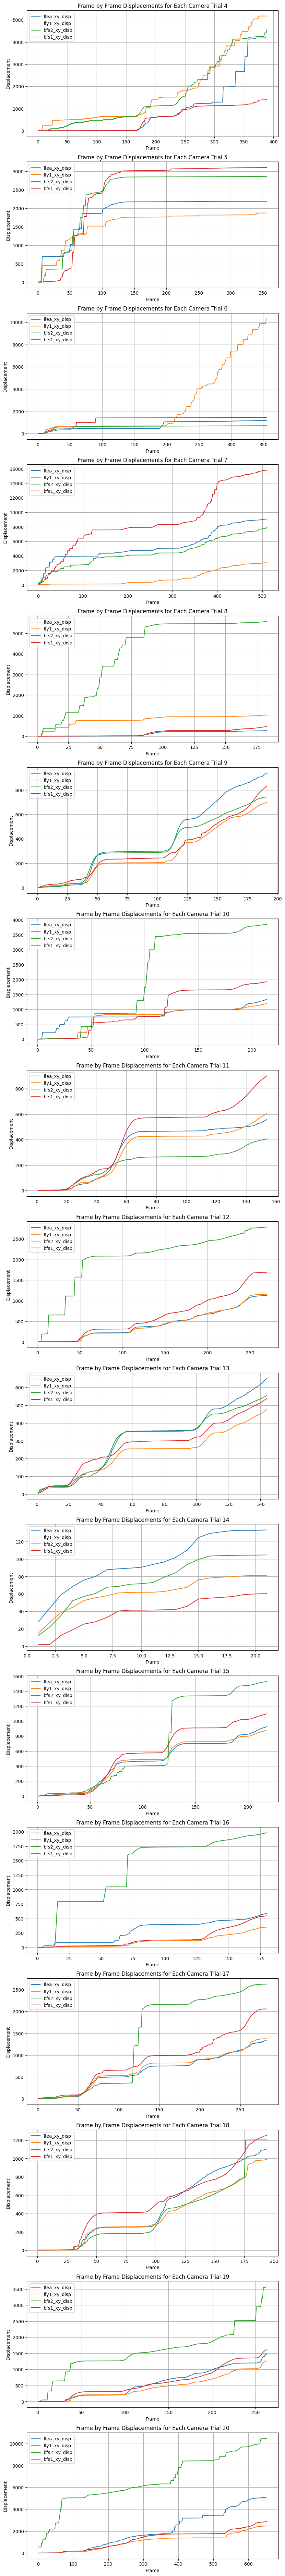

In [153]:
n = len(df_list)
fig, axes = plt.subplots(nrows=n, ncols = 1, figsize=(10,6*n))
if n == 1:
    axes = [axes]
for ax,df,t in zip(axes,df_list,list_trials):
    for col in df.columns:
        ax.plot(df.index, df[col].cumsum().fillna(0), label=col)
    ax.set_xlabel('Frame')
    ax.set_ylabel('Displacement')
    ax.set_title(f'Frame by Frame Displacements for Each Camera Trial {t}')
    ax.legend()
    ax.grid(True)

In [3]:
print(df_list)

[]
